# Trabajando con Gensim - LDA

## Preparación de documentos

In [1]:
doc1 = "Sugar is bad to consume. My sister likes to have sugar, but not my father."
doc2 = "My father spends a lot of time driving my sister around to dance practice."
doc3 = "Doctors suggest that driving may cause increased stress and blood pressure."
doc4 = "Sometimes I feel pressure to perform well at school, but my father never seems to drive my sister to do better."
doc5 = "Health experts say that Sugar is not good for your lifestyle."
# compilar documentos
doc_complete = [doc1, doc2, doc3, doc4, doc5]

## Pre-procesamiento

In [2]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sergio\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sergio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string

stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()


def preprocessor(doc):
    '''Función para el pre-procesamiento de texto'''
    
    # Eliminaremos palabras muy comunes en el lenguaje, que dificilmente puedan ayudarnos a identificar un campo semántico.
    # Convertiremos las palabras resultantes a minúsculas para evitar repetición de palabras
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    
    # Eliminamos los signos de puntuación: ya que no agrega ninguna información adicional al procesar datos de texto 
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    
    # Reduciremos las palabras a sus lemmas, formas básicas de las palabras, sin género ni conjugación
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    
    # Pudiéramos por ejemplo: dejar las palabras que podrían ser más signficativas: adjetivos, verbos, y sustantivos.
    # Omitir los adverbios, ya que no nos interesan las posibles modificaciones del sentido entre palabras cercanas, como negaciones o
    # amplificaciones entre otras actividades que crean conveniente para el pre-procesamiento de texto
    return normalized


doc_clean = [preprocessor(doc).split() for doc in doc_complete]  
doc_clean

# https://towardsdatascience.com/topic-modelling-in-python-with-spacy-and-gensim-dc8f7748bdbf

[['sugar', 'bad', 'consume', 'sister', 'like', 'sugar', 'father'],
 ['father',
  'spends',
  'lot',
  'time',
  'driving',
  'sister',
  'around',
  'dance',
  'practice'],
 ['doctor',
  'suggest',
  'driving',
  'may',
  'cause',
  'increased',
  'stress',
  'blood',
  'pressure'],
 ['sometimes',
  'feel',
  'pressure',
  'perform',
  'well',
  'school',
  'father',
  'never',
  'seems',
  'drive',
  'sister',
  'better'],
 ['health', 'expert', 'say', 'sugar', 'good', 'lifestyle']]

## Matriz término-documento

In [4]:
import gensim

from gensim.models.ldamodel import LdaModel

from gensim.corpora.dictionary import Dictionary

In [5]:
# Creación del diccionario de términos de nuestro courpus, donde se asigna un índice a cada término único.
common_dictionary = Dictionary(doc_clean)

# print(dictionary)
print(common_dictionary.token2id)

# Convertir la lista de documentos (corpus) en la Matriz de Términos del Documento utilizando el diccionario.
doc_term_matrix = [ common_dictionary.doc2bow(doc) for doc in doc_clean ]

doc_term_matrix

{'bad': 0, 'consume': 1, 'father': 2, 'like': 3, 'sister': 4, 'sugar': 5, 'around': 6, 'dance': 7, 'driving': 8, 'lot': 9, 'practice': 10, 'spends': 11, 'time': 12, 'blood': 13, 'cause': 14, 'doctor': 15, 'increased': 16, 'may': 17, 'pressure': 18, 'stress': 19, 'suggest': 20, 'better': 21, 'drive': 22, 'feel': 23, 'never': 24, 'perform': 25, 'school': 26, 'seems': 27, 'sometimes': 28, 'well': 29, 'expert': 30, 'good': 31, 'health': 32, 'lifestyle': 33, 'say': 34}


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2)],
 [(2, 1), (4, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)],
 [(8, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1)],
 [(2, 1),
  (4, 1),
  (18, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1)],
 [(5, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1)]]

## Ejecutar modelo LDA

In [6]:
# Creación del objeto para el modelo LDA usando la librería gensim
# https://radimrehurek.com/gensim/models/ldamodel.html

# Ejecución y entrenamiento del modelo LDA en la matriz de términos del documento.
ldamodel = LdaModel(doc_term_matrix, num_topics=3, id2word=common_dictionary)

# ldamodel = LdaModel(doc_term_matrix, num_topics=3, id2word=common_dictionary, passes=50)

Parameters
<ul>
    <li><em>corpus</em> (iterable of list of (int, float), optional) – Stream of document vectors or sparse matrix of shape (num_documents, num_terms). If you have a CSC in-memory matrix, you can convert it to a streamed corpus with the help of gensim.matutils.Sparse2Corpus. If not given, the model is left untrained (presumably because you want to call update() manually).</li>
    <li><em>num_topics</em> (int, optional) – The number of requested latent topics to be extracted from the training corpus.</li>
    <li><em>id2word</em> <code>({dict of (int, str), gensim.corpora.dictionary.Dictionary})</code> – Mapping from word IDs to words. It is used to determine the vocabulary size, as well as for debugging and topic printing.</li>
    <li><em>passes</em> (int, optional) – Number of passes through the corpus during training.</li>
</ul>

In [7]:
topic = ldamodel.print_topic(1) # Retorna un str
# topic = ldamodel.print_topic(num_topics=1, num_words=4) # Retorna un str
print(topic)
print('---next----')

def lda_topics(ldamodel, num_topics=3, num_words=4):
    '''Función dado un modelo LDA retornar una lista de n topicos con m palabras'''
    topics = ldamodel.print_topics(num_topics=num_topics, num_words=num_words)
    return topics

topics = lda_topics(ldamodel)
print(topics)
print('---next----')

from pprint import pprint
pprint(topics)

0.074*"sugar" + 0.073*"expert" + 0.073*"lifestyle" + 0.073*"good" + 0.072*"say" + 0.072*"health" + 0.021*"driving" + 0.020*"may" + 0.020*"increased" + 0.020*"doctor"
---next----
[(0, '0.070*"sugar" + 0.058*"sister" + 0.057*"father" + 0.051*"pressure"'), (1, '0.074*"sugar" + 0.073*"expert" + 0.073*"lifestyle" + 0.073*"good"'), (2, '0.066*"father" + 0.064*"sister" + 0.053*"driving" + 0.048*"dance"')]
---next----
[(0, '0.070*"sugar" + 0.058*"sister" + 0.057*"father" + 0.051*"pressure"'),
 (1, '0.074*"sugar" + 0.073*"expert" + 0.073*"lifestyle" + 0.073*"good"'),
 (2, '0.066*"father" + 0.064*"sister" + 0.053*"driving" + 0.048*"dance"')]


In [8]:
topic = ldamodel.show_topic(1) # Retorna list
topic

[('sugar', 0.074031465),
 ('expert', 0.07281982),
 ('lifestyle', 0.07256439),
 ('good', 0.072536096),
 ('say', 0.07231995),
 ('health', 0.07231769),
 ('driving', 0.020675076),
 ('may', 0.02037613),
 ('increased', 0.020284131),
 ('doctor', 0.020219829)]

In [9]:
ldamodel.show_topic(0)

[('sugar', 0.069724254),
 ('sister', 0.05836983),
 ('father', 0.056563392),
 ('pressure', 0.051070783),
 ('like', 0.040001683),
 ('consume', 0.039878253),
 ('bad', 0.039814353),
 ('driving', 0.036465522),
 ('cause', 0.036089394),
 ('suggest', 0.035542812)]

In [10]:
topics = ldamodel.show_topics(num_topics=3, num_words=4) # Retorna list to tuple
topics

[(0, '0.070*"sugar" + 0.058*"sister" + 0.057*"father" + 0.051*"pressure"'),
 (1, '0.074*"sugar" + 0.073*"expert" + 0.073*"lifestyle" + 0.073*"good"'),
 (2, '0.066*"father" + 0.064*"sister" + 0.053*"driving" + 0.048*"dance"')]

## Analizar los resultados del modelo LDA

Visualicemos los temas para la interpretación, usaremos el paquete de visualización popular, <b>pyLDAvis</b>. PyLDAvis ofrece la mejor visualización para ver la distribución de palabras clave y temas, para lo cual provee de una forma simple e interactiva analizar los resultados obtenidos.

Esta visualización permite enriquecer lo desarrollado, teniéndose en cuenta las siguientes observaciones:
<ul>
    <li>El gráfico representa nuestros N temas en forma de círculos (burbujas). Han sido dibujados usando la técnica de reducción de dimensionalidad (PCA). El objetivo es tener una distancia para evitar superposiciones y hacer que cada círculo sea único. Cuanto más grande la burbuja, más predominante es ese tópico.</li>
    <li>Cuando paso el cursor sobre un círculo, se muestran diferentes palabras a la derecha, mostrando la frecuencia de palabras (azul) y la frecuencia estimada de términos dentro del tema seleccionado (rojo).</li>
    <li>Los temas más cercanos entre sí están más relacionados.</li>
    <li>Un buen modelo de tópicos es aquel que tiene burbujas bastante grandes y que no se solapan, dispersas en todo el gráfico en lugar de estar todas juntas y clusterizadas en un único cuadrante. Un modelo con muchos tópicos seguramente tendrá burbujas pequeñas, ubicadas en una misma región del gráfico y con muchos casos de solapamiento.</li>
</ul>

In [11]:
# conda install -c conda-forge pyldavis
# Documentación: https://pyldavis.readthedocs.io/en/latest/modules/API.html

import pyLDAvis 
import pyLDAvis.gensim_models as gensimvis
import pickle 

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = gensimvis.prepare(ldamodel, doc_term_matrix, common_dictionary)

pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_{}.html'.format(3))

LDAvis_prepared

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\sparse\_sputils.py:44: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  upcast = np.find_common_type(args, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.022986  0.037528       1        1  62.032862
2     -0.042359 -0.030778       2        1  22.504924
1      0.065345 -0.006750       3        1  15.462215, topic_info=         Term      Freq     Total Category  logprob  loglift
30     expert  0.000000  0.000000  Default  30.0000  30.0000
33  lifestyle  0.000000  0.000000  Default  29.0000  29.0000
31       good  0.000000  0.000000  Default  28.0000  28.0000
34        say  0.000000  0.000000  Default  27.0000  27.0000
32     health  0.000000  0.000000  Default  26.0000  26.0000
..        ...       ...       ...      ...      ...      ...
8     driving  0.137463  1.619346   Topic3  -3.8788  -0.5996
18   pressure  0.133661  1.839003   Topic3  -3.9069  -0.7549
2      father  0.133956  2.276799   Topic3  -3.9047  -0.9662
4      sister  0.131797  2.303903   Topic3  -3.9209  -0.9943
3        like  0.126693  1.317033   Topic3  -3.9604  -0.4746

[132 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         1  0.760904        bad
21        1  0.890721     better
13        1  0.807683      blood
14        1  0.794766      cause
1         1  0.760338    consume
15        1  0.803233     doctor
22        1  0.849742      drive
8         1  0.617533    driving
8         2  0.617533    driving
2         1  0.878426     father
2         2  0.439213     father
23        1  0.871143       feel
16        1  0.826091  increased
3         1  0.759283       like
17        1  0.816930        may
24        1  0.886242      never
25        1  0.877298    perform
18        1  0.543773   pressure
26        1  0.911999     school
27        1  0.905733      seems
4         1  0.868092     sister
4         2  0.434046     sister
28        1  0.888765  sometimes
19        1  0.807086     stress
5         1  0.803737      sugar
20        1  0.799859    suggest
29        1  0.885644       well, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

# Caso de estudio de corpus de Wikipedia

In [12]:
# Funciones ya cargadas anteriormente
print(preprocessor.__doc__)
print(lda_topics.__doc__)

Función para el pre-procesamiento de texto
Función dado un modelo LDA retornar una lista de n topicos con m palabras


In [13]:
# conda install -c conda-forge wikipedia
import wikipedia

class TextFetcher:
    '''Clase para descargar el resumen'''
    def __init__(self, title):
        self.title = title
        page = wikipedia.page(title)
        self.text = page.summary

    def getText(self):
        return self.text


In [14]:
# Obtendremos la sección de resumen de 6 páginas de Wikipedia (3 sobre ciudades, 3 sobre temas)
pages = ['London', 'Natural Language Processing', 'Paris', 'Topic model', 'Berlin', 'Text mining']
docs = []

for p in pages:
    textFetcher = TextFetcher(p)
    text = preprocessor(textFetcher.getText())
    docs.append(text)
    

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# Usar CountVectorizer para encontrar tokens de:
vect = CountVectorizer(
    stop_words='english', # eliminar palabras cerradas
    lowercase=True, # convertir los tokens a minúsculas
    # min_df=2, # eliminar tokens que aparecen en al menos 2 documentos
    # max_df=round(len(docs)*0.25), # eliminar tokens que no aparecen en más del 25% de los documentos
    # token_pattern=r'\b[a-zAZ]{3,}\b' #  más de tres letras, ej: de 3 letras '(?u)\\b\\w\\w\\w+\\b'
)
# Ajustamos y transformamos
X = vect.fit_transform(docs)

# Convertir la matriz en formato scipy.sparse en un corpus gensim
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Asignación de ID de palabra a palabras (para usar en el parámetro id2word de LdaModel)
# Se utiliza para determinar el tamaño del vocabulario, así como para depurar e imprimir temas
id2word = dict((v, k) for k, v in vect.vocabulary_.items())
id2word

{434: 'london',
 428: 'listen',
 132: 'capital',
 412: 'largest',
 149: 'city',
 248: 'england',
 728: 'united',
 401: 'kingdom',
 552: 'population',
 466: 'million',
 655: 'stand',
 604: 'river',
 696: 'thames',
 642: 'southeast',
 334: 'head',
 49: '50mile',
 54: '80',
 402: 'km',
 261: 'estuary',
 501: 'north',
 620: 'sea',
 440: 'major',
 634: 'settlement',
 465: 'millennium',
 77: 'ancient',
 185: 'core',
 291: 'financial',
 141: 'centre',
 299: 'founded',
 609: 'roman',
 433: 'londinium',
 597: 'retains',
 452: 'medieval',
 117: 'boundary',
 750: 'westminster',
 748: 'west',
 142: 'century',
 357: 'hosted',
 486: 'national',
 326: 'government',
 532: 'parliament',
 28: '19th',
 586: 'refers',
 460: 'metropolis',
 353: 'historically',
 647: 'split',
 190: 'county',
 464: 'middlesex',
 258: 'essex',
 676: 'surrey',
 399: 'kent',
 340: 'hertfordshire',
 22: '1965',
 410: 'largely',
 170: 'comprised',
 330: 'greater',
 325: 'governed',
 45: '33',
 430: 'local',
 92: 'authority',
 93:

## Modelo LDA

In [16]:
# Usamos el constructor gensim.models.ldamodel.LdaModel para estimar
# los parámetros del modelo LDA en el corpus, y guardar en la variable `ldamodel`

ldamodel = LdaModel(corpus, num_topics=2, id2word=id2word, passes=50)

topics = lda_topics(ldamodel, 2, 10)
pprint(topics)

[(0,
  '0.022*"berlin" + 0.020*"london" + 0.016*"city" + 0.012*"topic" + '
  '0.009*"world" + 0.008*"museum" + 0.008*"germany" + 0.008*"document" + '
  '0.007*"capital" + 0.007*"population"'),
 (1,
  '0.016*"text" + 0.014*"paris" + 0.012*"city" + 0.011*"information" + '
  '0.010*"mining" + 0.009*"document" + 0.009*"world" + 0.008*"european" + '
  '0.007*"data" + 0.007*"language"')]


In [17]:
# Visualize the topics

word2id = dict((k, v) for k, v in vect.vocabulary_.items())
d = Dictionary()
d.id2token = id2word
d.token2id = word2id

pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(ldamodel, corpus, d )
LDAvis_prepared

PreparedData(topic_coordinates=             x    y  topics  cluster       Freq
topic                                          
0      0.08159  0.0       1        1  58.197797
1     -0.08159  0.0       2        1  41.802203, topic_info=           Term       Freq      Total Category  logprob  loglift
480      berlin  18.000000  18.000000  Default  30.0000  30.0000
0        london  16.000000  16.000000  Default  29.0000  29.0000
238       paris   8.000000   8.000000  Default  28.0000  28.0000
205        text  11.000000  11.000000  Default  27.0000  27.0000
669      mining   6.000000   6.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
66          art   2.731661   5.119550   Topic2  -5.3721   0.2441
335  collection   2.127966   3.829752   Topic2  -5.6218   0.2846
192        host   2.125289   3.147595   Topic2  -5.6231   0.4795
185         cup   2.125289   3.147595   Topic2  -5.6231   0.4795
258       union   2.124786   3.147658   Topic2  -5.6233   0.4792

[129 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
302       2  1.076168     1900
261       2  0.811244     2022
249       2  1.076168     2023
357       2  1.076168   agency
105       1  0.266352  airport
...     ...       ...      ...
424       2  0.214410     word
61        1  0.567966    world
61        2  0.405690    world
457       1  0.317739  written
457       2  0.635477  written

[130 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

## Mejor modelado de tópicos

En la figura se muestra, como propuesta, los pasos a seguir para obtener el modelado de tópicos óptimo, a partir de construir diversos modelos LDA con todas las posibles combinaciones de parámetros. Los parámetros que se tienen en cuenta son:
<ul>
    <li>un conjunto de número de tópicos, y</li>
    <li>el radio de velocidad de aprendizaje (learning_decay )</li>
</ul>
<br>
Para la selección del modelo óptimo se tiene en cuenta los valores de Log-likelihood (verosimilitud o, simplemente, verosimilitud o probabilidad logarítmica)

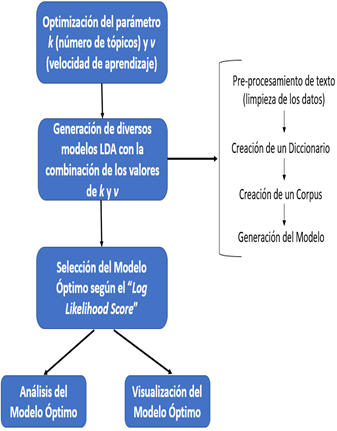

<ol>
  <li>Indague en el significado de los términos: velocidad de aprendizaje y Log-likelihood.</li>
  <li>Ponga en práctica la implementación de dicha propuesta a partir de algún ejemplo cualesquiera de conjunto de textos.</li>
    <b>Sugerencia:</b> Realizar varios casos de pruebas en el cual se modifiquen, eliminen o incorporen parámetros del preprocesamiento de los documentos para tratar de obtener un mejor modelado.
  <li>Describa el significado que tiene la Visualización del Modelo Óptimo (el cual es representado a través del paquete pyLDAvis) con respecto a las burbujas representadas, la dispersión de ellas y su tamaño en el gráfico.</li>
</ol>


In [26]:
import pyLDAvis.gensim_models

In [27]:
import pyLDAvis
import pyLDAvis.sklearn

ModuleNotFoundError: No module named 'pyLDAvis.sklearn'

In [23]:
pyLDAvis.enable_notebook()

In [28]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import numpy as np
import pandas as pd

from pprint import pprint
from sklearn.model_selection import GridSearchCV

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn

def best_model(docs):
    # Usar CountVectorizer para encontrar tokens de
    vectorizer = CountVectorizer(
        strip_accents = 'unicode',
        stop_words = 'english', # eliminar palabras cerradas
        lowercase = True, # convertir los tokens a minúsculas
        token_pattern = r'\b[a-zA-Z]{3,}\b', # más de tres letras
        max_df = 0.5, # eliminar tokens que no aparecen en más del 50% de los documentos
        min_df = round(len(docs)*0.25) # eliminar tokens que aparecen en al menos del 25% del total de documentos
    )
    
    data_vectorized = vectorizer.fit_transform(docs)   

    # Materialize the sparse data
    data_dense = data_vectorized.todense()
    #Compute Sparsicity = Percentage of Non-Zero cells
    print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100,"%")

    n_topics = [2, 3, 4, 5, 7, 10, 13, 15, 20]
    # Define Search Param
    search_params = {'n_components': n_topics, 'learning_decay': [.5, .7, .9]}
    
    # Init the Model
    # Latent Dirichlet Allocation with online variational Bayes algorithm 
    lda = LatentDirichletAllocation()
    
    # Init Grid Search Class
    model = GridSearchCV(lda, param_grid=search_params)
    
    # Do the Grid Search
    model.fit(data_vectorized)
    
    # Best Model
    best_lda_model = model.best_estimator_
    
    # Model Parameters
    print("Best Model's Params: ", model.best_params_)
    # Log Likelihood Score
    print("Best Log Likelihood Score: ", model.best_score_)
    # Perplexity
    print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))
        
    n_words=15
    tf_feature_names = vectorizer.get_feature_names()
    print_top_words(best_lda_model, tf_feature_names, n_words)
    
    topic_keywords = show_topics(vectorizer, best_lda_model, n_words)        

    # Topic - Keywords Dataframe
    df_topic_keywords = pd.DataFrame(topic_keywords)
    df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
    df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
    df_topic_keywords
    
    # How to visualize the LDA model with pyLDAvis?
    pyLDAvis.enable_notebook()
    # pyLDAvis now also supports LDA application from scikit-learn.
    panel = pyLDAvis.sklearn.prepare(best_lda_model, data_vectorized, vectorizer, mds='tsne')
    # uncomment next line if you want to make an html file with the visualization
    pyLDAvis.save_html(panel, 'best_model.html')
    return panel
    
# Show top n keywords for each topic
def show_topics(vectorizer, lda_model, n_words):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

ModuleNotFoundError: No module named 'pyLDAvis.sklearn'

In [46]:
best_model(docs)

Sparsicity:  37.46666666666666 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Model's Params:  {'learning_decay': 0.9, 'n_components': 2}
Best Log Likelihood Score:  -928.6617932545511
Model Perplexity:  91.09553325282796
Topic #0: text document information model data word computer process processing written different structure collection set discovery
Topic #1: city paris world museum europe capital million population area art university centre populous region popular



PreparedData(topic_coordinates=               x           y  topics  cluster       Freq
topic                                                   
1     -60.312317  141.369629       1        1  67.765975
0      60.312561 -141.369141       2        1  32.234025, topic_info=            Term       Freq      Total Category  logprob  loglift
109         text  13.000000  13.000000  Default  30.0000  30.0000
22      document  13.000000  13.000000  Default  29.0000  29.0000
47   information   9.000000   9.000000  Default  28.0000  28.0000
68         model   6.000000   6.000000  Default  27.0000  27.0000
18          data   6.000000   6.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
49       insight   1.810302   2.233874   Topic2  -4.5068   0.9219
105    structure   2.538990   3.803892   Topic2  -4.1685   0.7279
12    collection   2.538311   4.650558   Topic2  -4.1688   0.5267
92      referred   1.813335   3.079912   Topic2  -4.5051   0.6024
46     including   1.812457   3.080061   Topic2  -4.5056   0.6019

[95 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
1         2  0.895315    algorithm
2         2  1.014174  application
3         1  0.926201         area
4         1  1.023079          art
6         1  0.902256      billion
...     ...       ...          ...
117       1  1.023079   university
120       1  0.996393         west
121       2  0.974518         word
122       1  0.976960        world
124       2  0.814710      written

[69 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import LdaModel
from gensim.corpora import Dictionary
import numpy as np
import pandas as pd
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim

def best_model(docs):
    # Usar CountVectorizer para encontrar tokens
    vectorizer = CountVectorizer(
        strip_accents='unicode',
        stop_words='english',
        lowercase=True,
        token_pattern=r'\b[a-zA-Z]{3,}\b',
        max_df=0.5,
        min_df=round(len(docs) * 0.25)
    )

    data_vectorized = vectorizer.fit_transform(docs)
    tf_feature_names = vectorizer.get_feature_names_out()

    # Convert data to Gensim format
    data_gensim = np.array(data_vectorized.todense())
    corpus = [list(zip(range(len(tf_feature_names)), row)) for row in data_gensim]

    # Create a Gensim dictionary
    dictionary = Dictionary.from_corpus(corpus, id2word=dict(enumerate(tf_feature_names)))

    # Train LDA model
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=20, passes=10)

    # Visualize the LDA model using pyLDAvis
    pyLDAvis.enable_notebook()
    panel = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
    pyLDAvis.display(panel)

# Call the function with your text data
# best_model(your_text_data)


In [21]:
best_model(docs)

TypeError: Object of type complex is not JSON serializable